In [1]:
import pandas as pd
import numpy as np

# Display up to 90 columns of a dataframe
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 30)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read data
train_data = pd.read_csv('/Users/radda_iureva/Downloads/FDIR_dataset_training.csv', delimiter=',')


In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
train_data.isnull().values.any()


False

In [25]:
output_columns = []
for col in train_data.columns:
    if 'status' in col:
        output_columns.append(col)
output_columns

['status_fault_force',
 'status_fault_voltage',
 'status_fault_L',
 'status_fault_R',
 'status_fault_km',
 'status_fault_J',
 'status_fault_ke',
 'status_fault_kf',
 'status_fault_w']

In [30]:
df_output = train_data[output_columns]
df_output['status_no_fault']=df_output.sum(axis=1)
df_output.loc[:, 'status_no_fault'] = df_output.loc[:, 'status_no_fault'] .map({0: 1, 1: 0})
new_output_df = df_output.idxmax(axis=1)


<ipython-input-30-aa5fdd98f2f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['status_no_fault']=df_output.sum(axis=1)


In [31]:
train_data['status'] = new_output_df

In [32]:
train_data.head()

,voltage,velocity,current,initial velocity,initial current,nomimal velocity,nominal current,status_fault_force,status_fault_voltage,status_fault_L,status_fault_R,status_fault_km,status_fault_J,status_fault_ke,status_fault_kf,status_fault_w,status
0,12.00000,24.000000,9.600000,2,-1.490130,24.000000,9.600000,0,0,0,0,0,1,0,0,0,status_fault_J
1,4.93437,-0.299136,0.254281,3,-0.384627,-0.299136,0.254281,0,0,0,0,0,0,0,0,0,status_no_fault
2,12.00000,22.830600,9.498980,1,1.940950,22.830600,9.498980,0,0,0,0,0,0,0,0,0,status_no_fault
3,-12.00000,-23.572900,-9.579980,2,-1.728210,-23.572900,-9.579980,0,0,0,0,0,0,0,0,0,status_no_fault
4,-5.00000,-10.000000,-4.000000,1,1.848640,-10.000000,-4.000000,0,0,0,0,0,0,0,0,0,status_no_fault


In [33]:
train_data = train_data.drop(['status_fault_force'], axis=1)
train_data = train_data.drop(['status_fault_voltage'], axis=1)
train_data = train_data.drop(['status_fault_L'], axis=1)
train_data = train_data.drop(['status_fault_R'], axis=1)
train_data = train_data.drop(['status_fault_J'], axis=1)
train_data = train_data.drop(['status_fault_kf'], axis=1)
train_data = train_data.drop(['status_fault_ke'], axis=1)
train_data = train_data.drop(['status_fault_w'], axis=1)
train_data = train_data.drop(['status_fault_km'], axis=1)
train_data['nominal vol/vel'] = train_data['nomimal velocity']/train_data['nominal current']

In [34]:
train_data.head()

,voltage,velocity,current,initial velocity,initial current,nomimal velocity,nominal current,status,nominal vol/vel
0,12.00000,24.000000,9.600000,2,-1.490130,24.000000,9.600000,status_fault_J,2.500000
1,4.93437,-0.299136,0.254281,3,-0.384627,-0.299136,0.254281,status_no_fault,-1.176399
2,12.00000,22.830600,9.498980,1,1.940950,22.830600,9.498980,status_no_fault,2.403479
3,-12.00000,-23.572900,-9.579980,2,-1.728210,-23.572900,-9.579980,status_no_fault,2.460642
4,-5.00000,-10.000000,-4.000000,1,1.848640,-10.000000,-4.000000,status_no_fault,2.500000


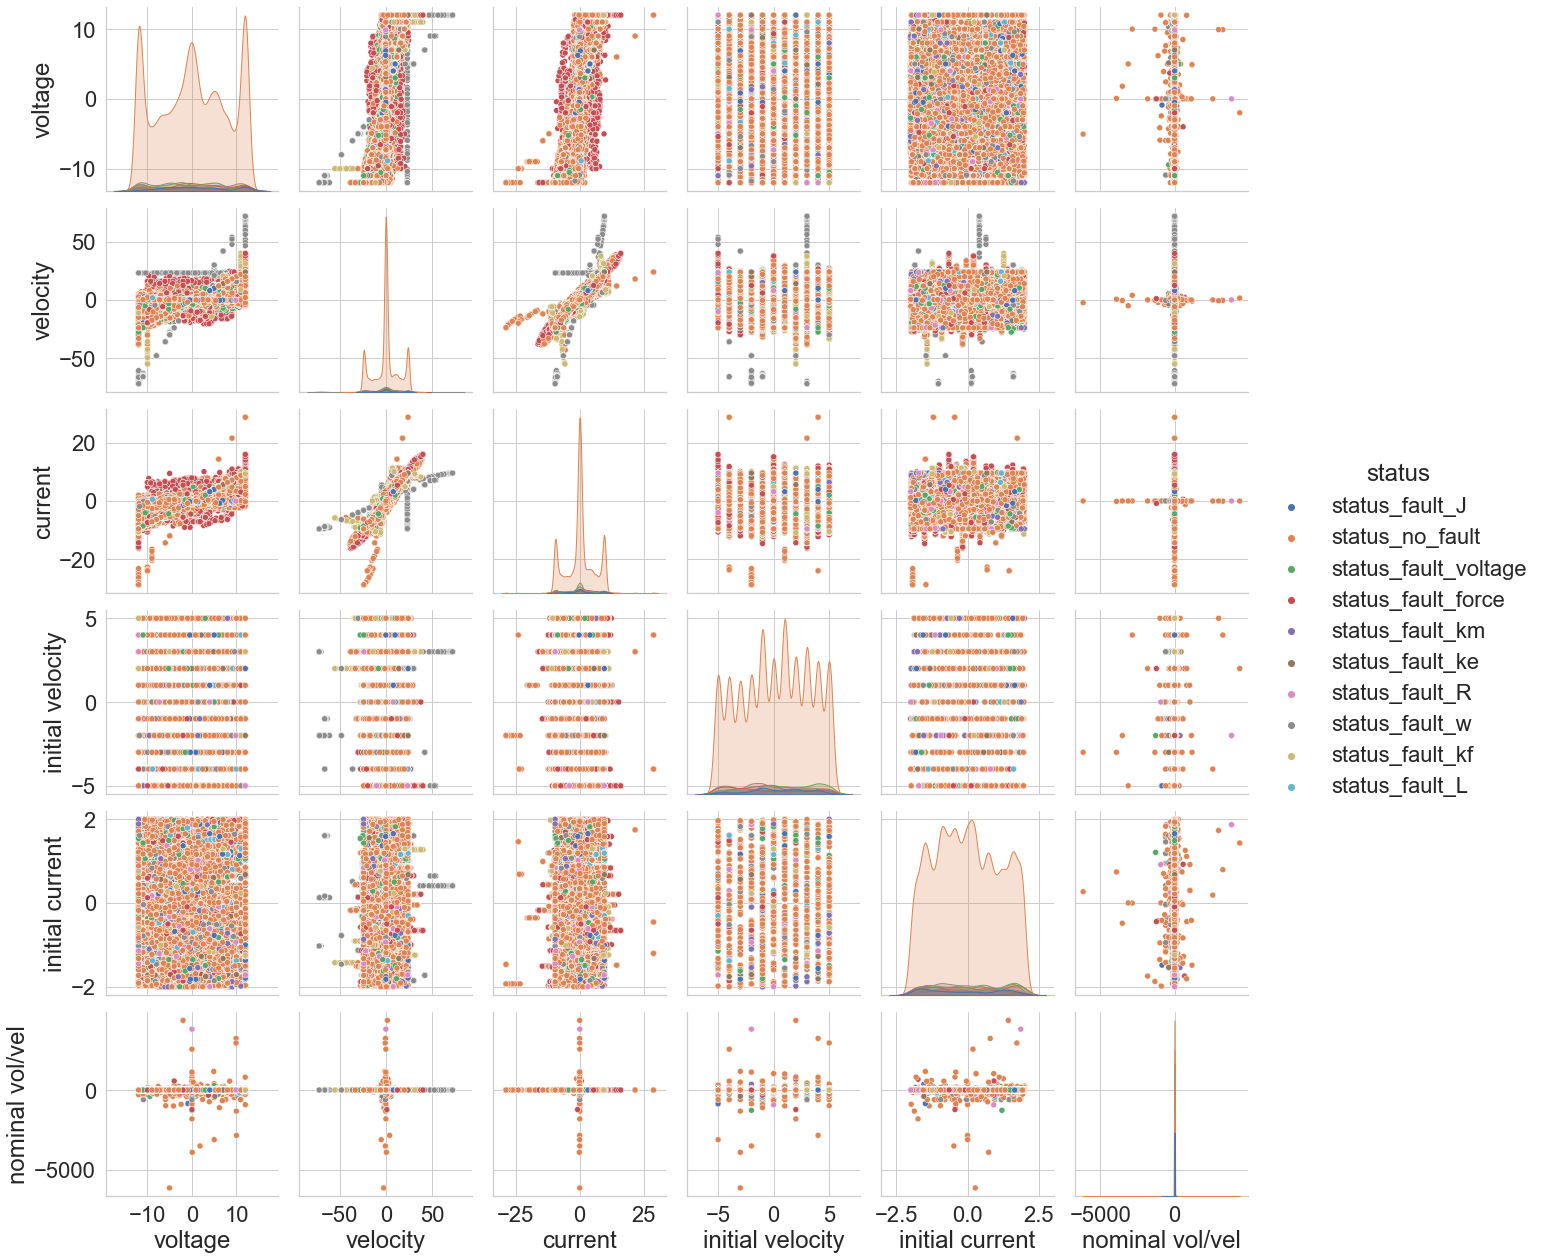

In [44]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(train_data, hue='status', height=3)
plt.show()

In [37]:
train_data = train_data.drop(['nomimal velocity'], axis=1)
train_data = train_data.drop(['nominal current'], axis=1)

In [39]:
x_data = train_data.drop(['status'],axis=1)
y_data = train_data['status']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['voltage' ,'velocity', 'current', 'initial velocity', 'initial current', 'nominal vol/vel'])
train_data.head()

,voltage,velocity,current,initial velocity,initial current,status,nominal vol/vel
0,12.00000,24.000000,9.600000,2,-1.490130,status_fault_J,2.500000
1,4.93437,-0.299136,0.254281,3,-0.384627,status_no_fault,-1.176399
2,12.00000,22.830600,9.498980,1,1.940950,status_no_fault,2.403479
3,-12.00000,-23.572900,-9.579980,2,-1.728210,status_no_fault,2.460642
4,-5.00000,-10.000000,-4.000000,1,1.848640,status_no_fault,2.500000


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:')
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[  346     1     0     1     0     2     0     0     0   105]
 [    0   375     2     0     0     0     0     0     3   104]
 [    1     2   411     0     0     0     0     0     0    94]
 [    1     0     1   627     2     0     0     0     1   223]
 [    0     0     0     0   363     0     2     5     0   100]
 [    3     0     0     0     0   372     0     0     0    90]
 [    0     0     0     0     2     0   346     0     2    65]
 [    4     0     1     0     0     0     1   680     0   165]
 [    6     1     0     4     0     8     0     0   714   191]
 [  124   103    77    86    69    66    89   122   138 12726]]
Classification Report:
                      precision    recall  f1-score   support

      status_fault_J       0.71      0.76      0.74       455
      status_fault_L       0.78      0.77      0.78       484
      status_fault_R       0.84      0.81      0.82       508
  status_fault_force       0.87      0.73      0.80       855
     status_fault